<a href="https://colab.research.google.com/github/Caramel96/Samuel_BuckbyCE888/blob/main/Lab_7/Copy_of_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [1]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


#### compile and fit model 

In [6]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 39s 12ms/step - loss: 0.4481 - accuracy: 0.8602 - val_loss: 0.0610 - val_accuracy: 0.9818
Epoch 2/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0566 - accuracy: 0.9823 - val_loss: 0.0477 - val_accuracy: 0.9862
Epoch 3/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0359 - accuracy: 0.9888 - val_loss: 0.0517 - val_accuracy: 0.9864
Epoch 4/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0369 - val_accuracy: 0.9897
Epoch 5/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.0370 - val_accuracy: 0.9902


#### evaluate model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 4ms/step - loss: 0.0295 - accuracy: 0.9904


0.9904000163078308

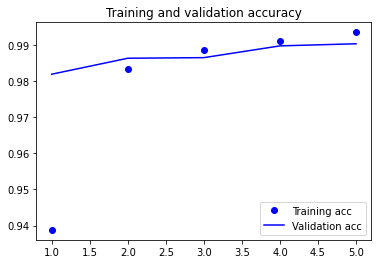

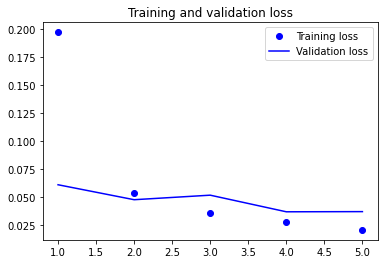

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search.  batch_size = [10, 20, 30]
epochs = [1, 5, 10 ]   batch_size=batch_size,epochs=epochs 

In [13]:
# Write code here
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
def create_model( optimizer='rmsprop', activation='relu'):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation = activation, input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation=activation))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64, verbose=1)
optimizer = ['RMSprop','Adam']
activation = ['relu', 'tanh']

param_grid = dict(optimizer=optimizer, activation=activation)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1)

grid_results = grid.fit(train_images, train_labels)

print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


750/750 [==============================] - 9s 11ms/step - loss: 0.4656 - accuracy: 0.8456
Epoch 2/10
750/750 [==============================] - 8s 11ms/step - loss: 0.0602 - accuracy: 0.9805
Epoch 3/10
750/750 [==============================] - 8s 11ms/step - loss: 0.0344 - accuracy: 0.9892
Epoch 4/10
750/750 [==============================] - 8s 11ms/step - loss: 0.0252 - accuracy: 0.9924
Epoch 5/10
750/750 [==============================] - 8s 11ms/step - loss: 0.0205 - accuracy: 0.9939
Epoch 6/10
750/750 [==============================] - 8s 11ms/step - loss: 0.0164 - accuracy: 0.9951
Epoch 7/10
750/750 [==============================] - 8s 11ms/step - loss: 0.0128 - accuracy: 0.9960
Epoch 8/10
750/750 [==============================] - 8s 11ms/step - loss: 0.0096 - accuracy: 0.9971
Epoch 9/10
750/750 [==============================] - 8s 10ms/step - loss: 0.0077 - accuracy: 0.9977
Epoch 10/10
188/188 [==============================] - 1s 5ms/step - loss: 0.0384 - accuracy: 0.9918
E

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 25.8min finished


938/938 [==============================] - 9s 8ms/step - loss: 0.3810 - accuracy: 0.8779
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0506 - accuracy: 0.9841
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0337 - accuracy: 0.9894
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0243 - accuracy: 0.9922
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0186 - accuracy: 0.9941
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0164 - accuracy: 0.9953
Epoch 7/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0111 - accuracy: 0.9966
Epoch 8/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0102 - accuracy: 0.9972
Epoch 9/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0079 - accuracy: 0.9975
Epoch 10/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0065 - accuracy: 0.9980
Best: 0.99